# **M**ulti **L**ayer **P**erceptron

To solve the XOR-Problem, multiple lines for seperation are needed (2x Perceptron) and the results of the two perceptrons also have to processed, for what we use another perceptron in the output-layer.

The so called **Hidden-Layers** contain all layers with nueral networks between the input and the output layer.

### Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import sys
sys.path += ["./src", "../"]

import ann106 as ann

In [11]:
help(ann)

Help on package ann106:

NAME
    ann106

PACKAGE CONTENTS
    activation_functions
    base
    data
    learn_rate
    loss_functions
    neural_networks

FILE
    d:\informatik\projekte\ann-106\src\ann106\__init__.py




In [12]:
help(ann.base)

Help on module ann106.base in ann106:

NAME
    ann106.base

DESCRIPTION
    A simple Framework for artificial neural networks. With prints, logs and more.
    It is recommended to use PyTorch or TensorFlow for professional projects, this is just an educational and fun project.
    
    
    :features:
    
    - Weight representation through layers (Layer class)
    - Customizable ANN
    - Multiple Loss functions
    - Sklearn Version
    - Train History (Time, Errors)
    - Lossplotting
    - Added Batch-Size and general training loop
    - Plotting (as string and as graph)
    
    
    :planned-features:
    
    - Add backward -> learning
    - Add parallel processing (of batches)
        - Parallel(n_jobs=-1)(delayed(compute_square)(num) for num in numbers
    - Add more Document Strings -> see: https://github.com/xXAI-botXx/Project-Helper/blob/main/guides/Sphinx_Helper.md#How-you-should-code
    - Add GPU calculation
    - Add validation data during training
    - Add Dataloade

### XOR Data Generation

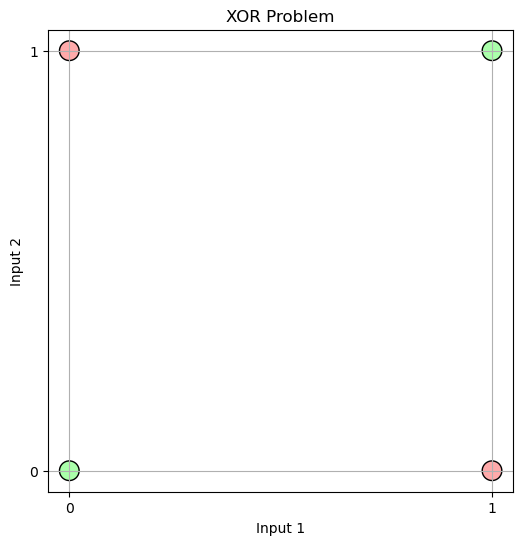

In [13]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0, 1, 1, 0])

plt.figure(figsize=(6, 6))
cmap = ListedColormap(['#AAFFAA', '#FFAAAA'])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, s=200, edgecolor='k', marker='o')

plt.title("XOR Problem")
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.grid(True)
plt.show()

### Neural Network Solution
-> "Deep Neural Network"

In [14]:
class MLP(ann.base.ArtificialNeuralNetwork):
    def __init__(self):
        super().__init__()
        self.prediction_elements_tuple = {
            "X": True,
            "y": True,
            "y_": False,
            "all_y_": True,
            "error": False
        }
        self.name = "MLP"
        self.layers = [
                ann.base.Layer(2, 2, ann.activation_functions.sigmoid), 
                ann.base.Layer(2, 1, ann.activation_functions.sigmoid),
                    ]

    def update_weights(self, prediction_element):
        # extract needed elements
        cur_X, cur_y, cur_y_pred = prediction_element 
        cur_y_pred = cur_y_pred[0]
        cur_error = cur_y - cur_y_pred
        
        delta_weights = self.get_lr() * cur_error * cur_X
        self.layers[0].weights = self.layers[0].weights+delta_weights

        self.layers[0].bias = self.layers[0].bias + self.get_lr() * cur_error

    def loss_function(self, y, y_):
        return {"Sum Loss":ann.loss_functions.sum_error(y, y_)} # y - y_

    def predict(self, x):
        x = self.scale(x)
        return self.forward(x)

In [15]:
print(MLP())


################################################################

MLP - Architecture:
--------------------------------
Input: 2, Output: 2, Activation: pass_through
--------------------------------
Input: 2, Output: 1, Activation: pass_through
--------------------------------
Output Function:
    def predict(self, x):
        x = self.scale(x)
        # return self.forward(x)
        return ann.activation_functions.step_function(self.forward(x), threshold=0.0, greater_equal_value=1, smaller_value=-1)


Loss Function:
    def loss_function(self, y, y_):
        return {"Sum Loss":ann.loss_functions.sum_error(y, y_)} # y - y_


Update Weights Function:
    def update_weights(self, prediction_element):
        # extract needed elements
        cur_X, cur_y, cur_y_pred = prediction_element 
        cur_y_pred = cur_y_pred[0]
        cur_error = cur_y - cur_y_pred
        
        delta_weights = self.get_lr() * cur_error * cur_X
        self.layers[0].weights = self.layers[0].weights+delt

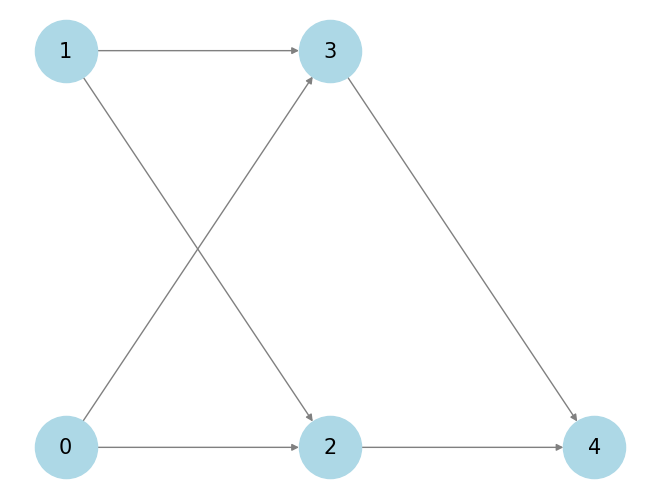

In [16]:
MLP().plot_architecture()

### More Complex Task

More complex tasks need even more hidden-layer/more neurons to solve the problem. This solution should need about 5 lines. Count by yourself, drawing linear lines.

Matplotlib Style: seaborn-v0_8-deep


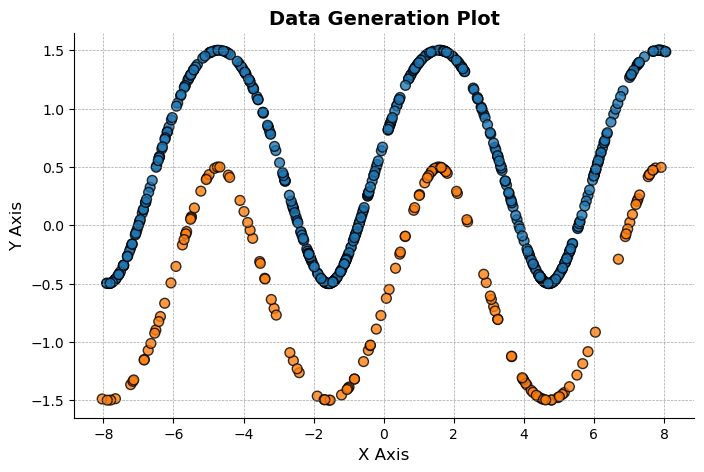

In [17]:
X, y = ann.data.data_generator_binary_classification(
                            x_value_range_class_1=(-8, 8), y_value_range_class_1=(0.5, 0.5), 
                            x_value_range_class_2=(-8, 8), y_value_range_class_2=(-0.5, -0.5), 
                            value_amount_class_1=500, value_amount_class_2=150,
                            func=np.sin, plotting=True, plot_style="seaborn-v0_8-deep")
y = np.where(y==0, -1, y)

NameError: name 'model' is not defined

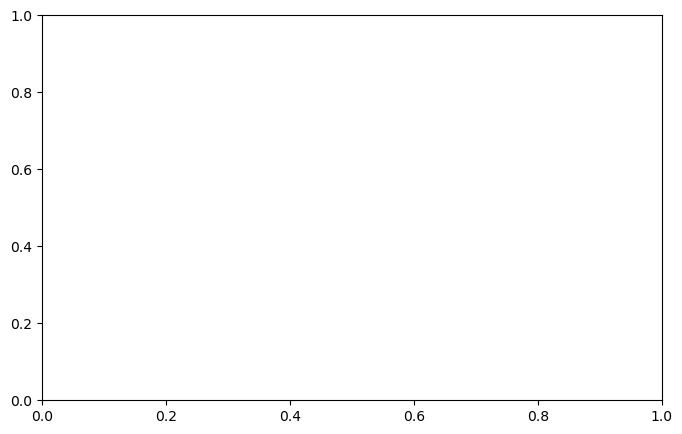

In [18]:
plt.style.use('seaborn-v0_8-dark-palette')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
colors = ["#ff7f0e" if cur_y  == 1 else "#1f77b4" for cur_y in [model.predict(x) for x in X]]
ax.scatter(X[:,0], X[:,1], c=colors, s=50, edgecolor='k', alpha=0.8)
ax.grid()
plt.style.use('default')